In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
df = pd.read_csv("Student_Performance.csv")

Розвідковий аналіз EDA

In [27]:
print("=== Info ===")
print(df.info())

print("\n=== Describe ===")
print(df.describe())

print("\n=== Пропущені значення ===")
print(df.isnull().sum())

=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None

=== Describe ===
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.

Кореляційна матриця

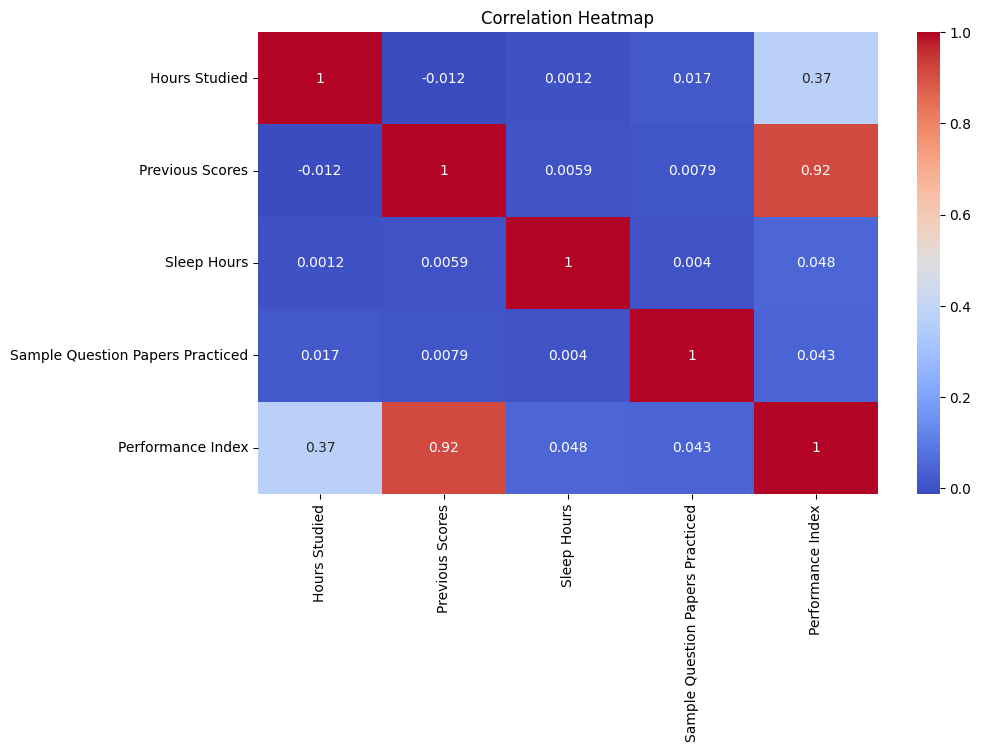

In [28]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Обробка категоріальних змінних

In [29]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})
print(df)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Paper

Вибір ознак та цільової змінної

In [30]:
target = "Performance Index"
X = df.drop(columns=[target])
y = df[target]

Поділ на навчальну та тестову вибірки

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

 Нормалізація/Стандартизація

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# стовпчик одиниць (intercept β0)
X_train_final = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_final = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

print("Форма X_train_final:", X_train_final.shape)
print("Форма X_test_final:", X_test_final.shape)
print("Форма y_train:", y_train.shape)
print("Форма y_test:", y_test.shape)

Форма X_train_final: (8000, 6)
Форма X_test_final: (2000, 6)
Форма y_train: (8000,)
Форма y_test: (2000,)


Реалізація методу градієнтного спуску з нуля

Ініціалізація параметрів

In [33]:
n_features = X_train_final.shape[1]
b = np.zeros(n_features)  # початкові ваги

In [34]:
learning_rate = 0.01 #гіперпараметри
epochs = 1000

Функція для обчислення функції втрат (MSE)

In [35]:
def compute_cost(X, y, b):
    predictions = X.dot(b)
    errors = predictions - y
    mse = (1 / len(y)) * np.sum(errors ** 2)
    return mse

Функція градієнтного спуску

In [36]:
def gradient_descent(X, y, b, learning_rate, epochs):
    cost_history = []
    m = len(y)
    
    for _ in range(epochs):
        # Обчислення передбачення
        predictions = X.dot(b)
        
        # Обчислення помилки
        errors = predictions - y
        
        # Обчислення градієнта  (похідна MSE за b)
        gradient = (1 / m) * X.T.dot(errors)
        
        # Оновлення ваг
        b = b - learning_rate * gradient
        
        # Збереження поточного MSE для історії
        cost = compute_cost(X, y, b)
        cost_history.append(cost)
    
    return b, cost_history

Навчання моделі

In [37]:
b_final, cost_history = gradient_descent(X_train_final, y_train, b, learning_rate, epochs)

print("Навчені ваги (β):")
print(b_final)

Навчені ваги (β):
[55.30911213  7.40093109 17.63646538  0.30430629  0.81002051  0.54895455]


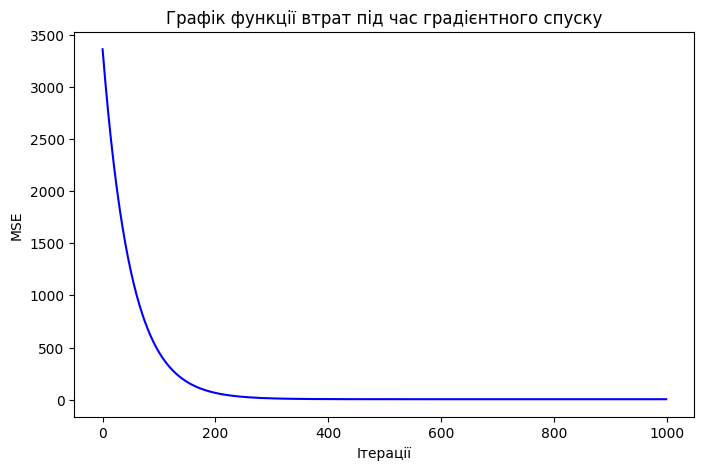

In [38]:
plt.figure(figsize=(8,5))
plt.plot(range(epochs), cost_history, color='blue')
plt.xlabel("Ітерації")
plt.ylabel("MSE")
plt.title("Графік функції втрат під час градієнтного спуску")
plt.show()

Градієнтний спуск довів, що модель справді навчається, а не застряє на випадкових значеннях

Оцінка якості моделі на тестових даних 

In [39]:
y_pred = X_test_final.dot(b_final) # прогнозування
print(y_pred)

[54.70936046 22.61485453 47.90109515 ... 16.79278468 63.34056999
 45.94062664]


In [40]:
mse_test = np.mean((y_test - y_pred) ** 2)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"MSE на тестових даних: {mse_test:.4f}")
print(f"R² Score на тестових даних: {r2:.4f}")

MSE на тестових даних: 4.0825
R² Score на тестових даних: 0.9890


Результати тестових метрик підтверджують, що якість передбачень адекватна

Порівняння з бейзлайном

In [41]:
# Бейзлайн: завжди передбачаємо середнє значення y_train
y_baseline = np.mean(y_train)
mse_baseline = np.mean((y_test - y_baseline) ** 2)

print(f"MSE бейзлайну (середнє y_train): {mse_baseline:.4f}")

MSE бейзлайну (середнє y_train): 370.7730


 Перевірка припущень класичної лінійної регресії (6 припущень)

1.Лінійність зв'язку

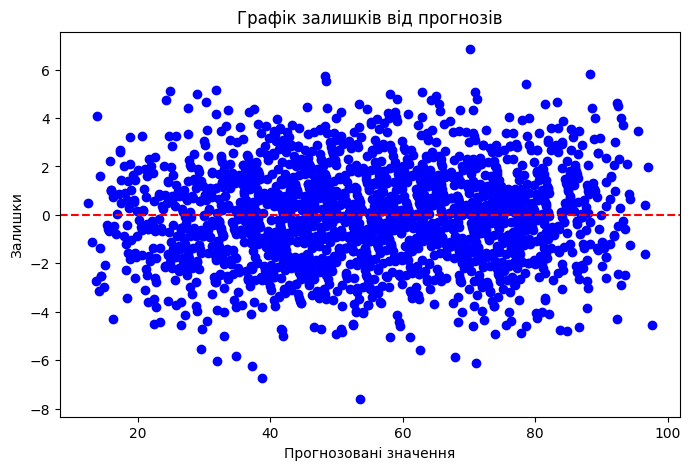

In [42]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Прогнозовані значення")
plt.ylabel("Залишки")
plt.title("Графік залишків від прогнозів")
plt.show()

Графік залишків від прогнозів показує випадкове розкидання навколо нуля, без явного U-подібного чи іншого патерну

Висновок: лінійність виконується

2.Відсутність мультиколінеарності

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_features = pd.DataFrame(X_train_final[:,1:], columns=X.columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_features.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_features.values, i) for i in range(X_train_features.shape[1])]

print(vif_data)

                            Feature       VIF
0                     Hours Studied  1.000387
1                   Previous Scores  1.000243
2        Extracurricular Activities  1.000428
3                       Sleep Hours  1.000461
4  Sample Question Papers Practiced  1.000320


усі VIF ≈ 1.0 (далеко нижче навіть від порогу 5)

Висновок: мультиколінеарності немає, ознаки незалежні

3.Нормальність залишків

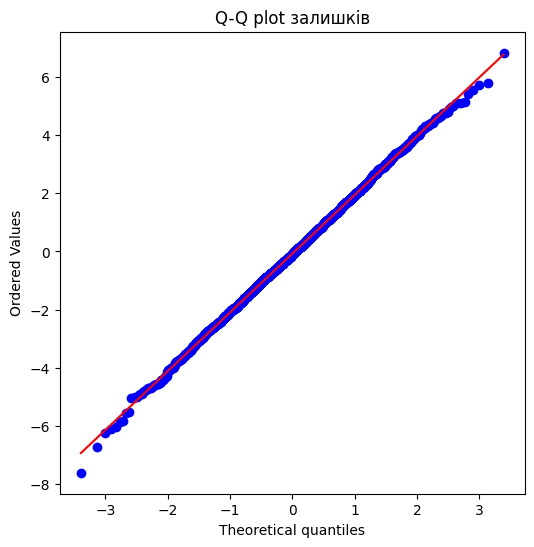

In [44]:
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(residuals, plot=plt)
plt.title("Q-Q plot залишків")
plt.show()

точки добре лягають на діагональ, відхилення мінімальні

In [45]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print(f"Shapiro-Wilk тест: stat={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("Залишки приблизно нормальні")
else:
    print("Залишки не нормальні")

Shapiro-Wilk тест: stat=0.9996, p-value=0.9751
Залишки приблизно нормальні


p-value = 0.9751 > 0.05 → немає підстав відкидати нормальність

4.Гомоскедастичність (постійна дисперсія залишків)

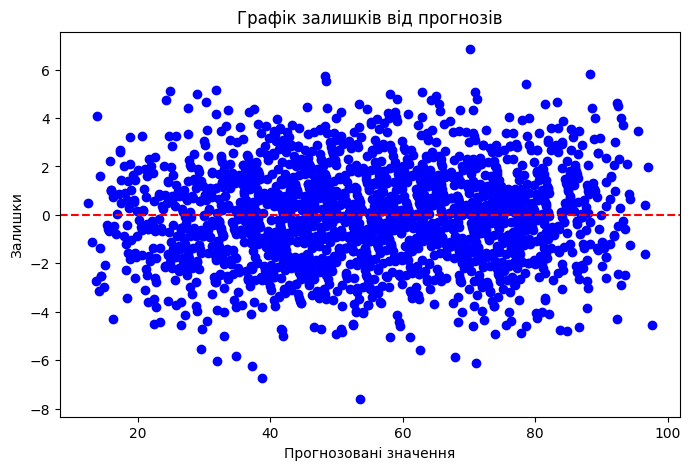

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Прогнозовані значення")
plt.ylabel("Залишки")
plt.title("Графік залишків від прогнозів")
plt.show()

ширина "хмари" точок приблизно однакова по всій осі X (нема «воронки»)

Висновок: дисперсія залишків постійна - припущення виконується

5.Відсутність автокореляції залишків

In [47]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw:.4f}")

Durbin-Watson statistic: 2.0474


Durbin-Watson = 2.0474 (ідеальне значення ≈ 2)

Висновок: автокореляції немає

6.Відсутність викидів та впливових спостережень

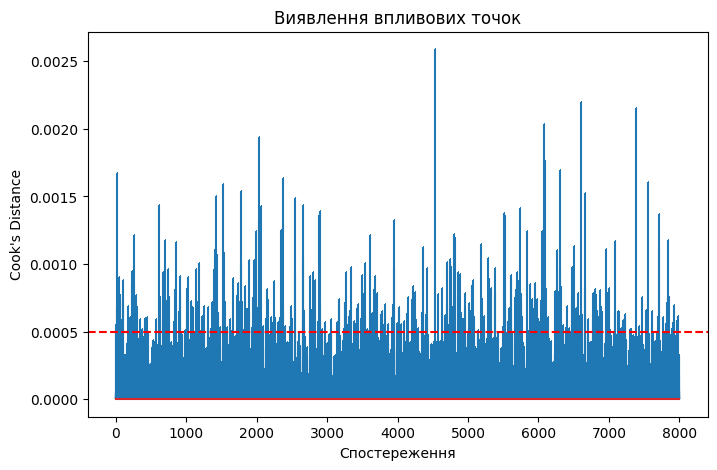

Індекси впливових спостережень: [  10   18   19   22   51   62   63   70   89  101  108  168  206  235
  237  260  265  282  305  340  377  416  419  443  571  612  632  635
  666  693  720  730  733  742  757  762  834  835  844  851  859  898
  906  918  978 1010 1016 1033 1066 1083 1097 1120 1144 1149 1182 1201
 1205 1218 1259 1312 1315 1346 1360 1365 1384 1394 1406 1414 1422 1443
 1449 1458 1478 1528 1534 1549 1553 1574 1616 1632 1645 1661 1671 1725
 1728 1736 1741 1746 1749 1771 1775 1778 1799 1818 1835 1842 1849 1854
 1861 1873 1889 1891 1931 1945 1967 1985 1991 2004 2030 2038 2052 2053
 2056 2088 2090 2127 2152 2166 2210 2227 2250 2265 2298 2299 2327 2343
 2355 2365 2369 2377 2407 2467 2493 2500 2547 2550 2657 2658 2665 2671
 2758 2771 2797 2819 2827 2872 2890 2897 2898 2921 2970 3049 3055 3136
 3168 3172 3245 3247 3260 3271 3272 3296 3313 3329 3336 3380 3399 3409
 3421 3433 3442 3476 3500 3505 3531 3541 3544 3564 3598 3602 3604 3609
 3633 3643 3662 3674 3703 3759 3772 3776 3785

In [48]:
import statsmodels.api as sm

# Навчаємо модель через OLS для перевірки впливових точок
X_train_sm = sm.add_constant(X_train_final[:,1:])  # додаємо стовпчик одиниць
model = sm.OLS(y_train, X_train_sm).fit()

influence = model.get_influence()
(c, p) = influence.cooks_distance

plt.figure(figsize=(8,5))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.axhline(y=4/len(c), color='red', linestyle='--')
plt.xlabel("Спостереження")
plt.ylabel("Cook's Distance")
plt.title("Виявлення впливових точок")
plt.show()

# Впливові спостереження
influential_points = np.where(c > 4/len(c))[0]
print("Індекси впливових спостережень:", influential_points)

список індексів довгий - у вибірці є спостереження, які суттєво впливають на модель

Висновок: припущення порушується, на результати регресії сильно впливають окремі точки 